<a href="https://colab.research.google.com/github/nv-hiep/flight_delay_prediction/blob/master/step2_read_data_features_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 2: FEATURES SELECTION**

**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


**Connect and authorize google drive with google colab:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ls

Mounted at /content/gdrive


# 1. Import Libraries



In [ ]:
import os
import numpy   as np
import pandas  as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline  

# 2. Data directory

In [ ]:
data_dir    = '/content/gdrive/My Drive/data'
%cd '/content/gdrive/My Drive/data'

current_dir = os.getcwd()
print(current_dir)
data_path = os.path.join(data_dir, 'flights', '')
print(data_path)

/content/gdrive/My Drive/data
/content/gdrive/My Drive/data
/content/gdrive/My Drive/data/flights/


# 3. Read flight data

In [ ]:
df = pd.read_csv(os.path.join(data_path, 'merged_data_janfeb.csv') )
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_NAME
0,2017,1,1,16,1,AA,N3FYAA,2186,DFW,PSP,910,913.0,3.0,26.0,5.0,1018,1024.0,6.0,188.0,191.0,160.0,1126.0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.
1,2017,1,1,17,2,AA,N3ASAA,2186,DFW,PSP,910,904.0,-6.0,31.0,4.0,1018,1011.0,-7.0,188.0,187.0,152.0,1126.0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.
2,2017,1,1,18,3,AA,N3AKAA,2186,DFW,PSP,910,908.0,-2.0,44.0,5.0,1018,1028.0,10.0,188.0,200.0,151.0,1126.0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.
3,2017,1,1,19,4,AA,N3LSAA,2186,DFW,PSP,910,905.0,-5.0,41.0,8.0,1018,1047.0,29.0,188.0,222.0,173.0,1126.0,0.0,0.0,29.0,0.0,0.0,American Airlines Inc.
4,2017,1,1,20,5,AA,N3NBAA,2186,DFW,PSP,910,903.0,-7.0,20.0,6.0,1018,1011.0,-7.0,188.0,188.0,162.0,1126.0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.


In [ ]:
print(df.shape)
print(len(df.columns))
print(df.columns)

(842870, 28)
28
Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'AIRLINE_NAME'],
      dtype='object')


In [ ]:
# Check null values
df.isnull().sum()

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
OP_UNIQUE_CARRIER      0
TAIL_NUM               0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
AIRLINE_NAME           0
dtype: int64

In [ ]:
# OK! No more null/nan values
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842870 entries, 0 to 842869
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 842870 non-null  int64  
 1   QUARTER              842870 non-null  int64  
 2   MONTH                842870 non-null  int64  
 3   DAY_OF_MONTH         842870 non-null  int64  
 4   DAY_OF_WEEK          842870 non-null  int64  
 5   OP_UNIQUE_CARRIER    842870 non-null  object 
 6   TAIL_NUM             842870 non-null  object 
 7   OP_CARRIER_FL_NUM    842870 non-null  int64  
 8   ORIGIN               842870 non-null  object 
 9   DEST                 842870 non-null  object 
 10  CRS_DEP_TIME         842870 non-null  int64  
 11  DEP_TIME             842870 non-null  float64
 12  DEP_DELAY            842870 non-null  float64
 13  TAXI_OUT             842870 non-null  float64
 14  TAXI_IN              842870 non-null  float64
 15  CRS_ARR_TIME     

In [ ]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'AIRLINE_NAME'],
      dtype='object')

# 4. Drop unnecessary columns 

**Drop the columns 'AIRLINE_NAME', 'YEAR', 'QUARTER' because they are not necessary. I only consider data in January and February 2017. And AIRLINE was coded as OP_UNIQUE_CARRIER**

In [ ]:
df.drop(['AIRLINE_NAME', 'YEAR', 'QUARTER'], axis=1, inplace=True)

# 5. Create TARGETS as CLASSES

**Instead of predicting the delay time in minutes, I'll predict in delay intervals:**

**0: ARR_DELAY <= 0 for no delay**

**1: 0 < ARR_DELAY <= 30 (minutes)**

**2: 30 < ARR_DELAY <= 60 (minutes)**

**3: 60 < ARR_DELAY <= 120 (minutes)**

**43: 120 < ARR_DELAY**

In [ ]:
# Create delayed labels, if the flights are delayed more than 30 minutes (delay_thresh)
df['DELAYED'] = df['ARR_DELAY'].apply(lambda x: 0 if x <= 0 else 1 if (x > 0 and x <= 30) else 2 if (x > 30 and x <= 60) else 3 if (x > 60 and x <= 120) else 4)

In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
0,1,16,1,AA,N3FYAA,2186,DFW,PSP,910,913.0,3.0,26.0,5.0,1018,1024.0,6.0,188.0,191.0,160.0,1126.0,0.0,0.0,0.0,0.0,0.0,1
1,1,17,2,AA,N3ASAA,2186,DFW,PSP,910,904.0,-6.0,31.0,4.0,1018,1011.0,-7.0,188.0,187.0,152.0,1126.0,0.0,0.0,0.0,0.0,0.0,0
2,1,18,3,AA,N3AKAA,2186,DFW,PSP,910,908.0,-2.0,44.0,5.0,1018,1028.0,10.0,188.0,200.0,151.0,1126.0,0.0,0.0,0.0,0.0,0.0,1
3,1,19,4,AA,N3LSAA,2186,DFW,PSP,910,905.0,-5.0,41.0,8.0,1018,1047.0,29.0,188.0,222.0,173.0,1126.0,0.0,0.0,29.0,0.0,0.0,1
4,1,20,5,AA,N3NBAA,2186,DFW,PSP,910,903.0,-7.0,20.0,6.0,1018,1011.0,-7.0,188.0,188.0,162.0,1126.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DELAYED'],
      dtype='object')

# 6. Convert time of Departure and arrival

In [ ]:
def convert_time(x):
  x = x/100.
  return round( int(x) + (x - int(x))*100/60, 2)

In [ ]:
# The actual departure time
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].apply(convert_time)
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].apply(lambda x:0 if x==24 else x)

df['DEP_TIME'] = df['DEP_TIME'].apply(convert_time)
df['DEP_TIME'] = df['DEP_TIME'].apply(lambda x:0 if x==24 else x)

# The actual arrival time
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].apply(convert_time)
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].apply(lambda x:0 if x==24 else x)

df['ARR_TIME'] = df['ARR_TIME'].apply(convert_time)
df['ARR_TIME'] = df['ARR_TIME'].apply(lambda x:0 if x==24 else x)

# 7. Label - Encoding the categorical feautures

Here I should use One-hot-coding method, however this method will produce many more columns, so it would take a long time to train.

I will use the Label-encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df['ORIGIN'] = lb_make.fit_transform(df['ORIGIN'])
df['DEST'] = lb_make.transform(df['DEST'])

df['OP_UNIQUE_CARRIER'] = lb_make.fit_transform(df['OP_UNIQUE_CARRIER'])
df['TAIL_NUM'] = lb_make.fit_transform(df['TAIL_NUM'])

In [ ]:
# dummy_fields = ['DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST']
# for x in dummy_fields:
#   dummy = pd.get_dummies(df[x], drop_first=False, prefix=x)
#   df = pd.concat( [df, dummy], axis=1)
# df_sub.drop(dummy_fields, axis=1, inplace=True)

# 8. Remove Missing Values

In [ ]:
# Missing values (in percent)
df_missing = (df.isnull().sum() / len(df)).sort_values(ascending = False)
df_missing

DELAYED                0.0
LATE_AIRCRAFT_DELAY    0.0
DAY_OF_MONTH           0.0
DAY_OF_WEEK            0.0
OP_UNIQUE_CARRIER      0.0
TAIL_NUM               0.0
OP_CARRIER_FL_NUM      0.0
ORIGIN                 0.0
DEST                   0.0
CRS_DEP_TIME           0.0
DEP_TIME               0.0
DEP_DELAY              0.0
TAXI_OUT               0.0
TAXI_IN                0.0
CRS_ARR_TIME           0.0
ARR_TIME               0.0
ARR_DELAY              0.0
CRS_ELAPSED_TIME       0.0
ACTUAL_ELAPSED_TIME    0.0
AIR_TIME               0.0
DISTANCE               0.0
CARRIER_DELAY          0.0
WEATHER_DELAY          0.0
NAS_DELAY              0.0
SECURITY_DELAY         0.0
MONTH                  0.0
dtype: float64

In [ ]:
# Identify missing values above threshold
df_missing = df_missing.index[df_missing > 0.75]

In [ ]:
print('There are %d columns with more than 75%% missing values' % len(df_missing))

There are 0 columns with more than 75% missing values


In [ ]:
# Let's drop the columns, one-hot encode the dataframes, and then align the columns of the dataframes.
df.drop(df_missing, axis=1, inplace=True)

# 9. Drop Correlated Variables

Collinear variables are those which are highly correlated with one another. These can decrease the model's availablility to learn, decrease model interpretability, and decrease generalization performance on the test set. Clearly, these are three things we want to increase, so removing collinear variables is a useful step. We will establish an admittedly arbitrary threshold for removing collinear variables, and then remove one out of any pair of variables that is above that threshold.

In [ ]:
# Threshold for removing correlated variables
threshold = 0.9

# Correlation matrix with absolute values
corr_matrix = df.corr().abs()
corr_matrix.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
MONTH,1.000000,0.078433,0.018242,0.001875,0.001192,0.002646,0.001214,0.001315,0.000338,0.003748,0.057832,0.039504,0.025841,0.000558,0.004430,0.068219,0.005027,0.013362,0.006666,0.005915,0.027113,0.014750,0.030923,0.004976,0.042593,0.084126
DAY_OF_MONTH,0.078433,1.000000,0.030003,0.002480,0.001832,0.001202,0.001319,0.000873,0.000059,0.006274,0.057448,0.019278,0.015777,0.003898,0.002422,0.069892,0.005366,0.014922,0.011642,0.007146,0.014812,0.016190,0.040952,0.004939,0.047201,0.089201
DAY_OF_WEEK,0.018242,0.030003,1.000000,0.007219,0.005703,0.057089,0.008290,0.008225,0.012253,0.009011,0.008678,0.011043,0.018624,0.012866,0.004564,0.004743,0.021225,0.019289,0.019746,0.024666,0.013545,0.011344,0.005023,0.001512,0.002629,0.003412
OP_UNIQUE_CARRIER,0.001875,0.002480,0.007219,1.000000,0.065549,0.190220,0.072460,0.072396,0.002148,0.011485,0.022798,0.173839,0.090488,0.002718,0.011233,0.029639,0.151074,0.146926,0.121870,0.116087,0.014053,0.001278,0.000873,0.005546,0.029655,0.036991
TAIL_NUM,0.001192,0.001832,0.005703,0.065549,1.000000,0.006398,0.066219,0.066214,0.010056,0.007352,0.007367,0.018755,0.042815,0.001683,0.000095,0.021229,0.049570,0.058395,0.054260,0.049344,0.002064,0.001743,0.019104,0.001334,0.007911,0.030405


In [ ]:
# Upper triangle of correlations
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Lower triangle of correlations
lower_matrx = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
lower_matrx.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,0.078433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_WEEK,0.018242,0.030003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_UNIQUE_CARRIER,0.001875,0.002480,0.007219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAIL_NUM,0.001192,0.001832,0.005703,0.065549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:342: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.figure.draw(ax.figure.canvas.get_renderer())


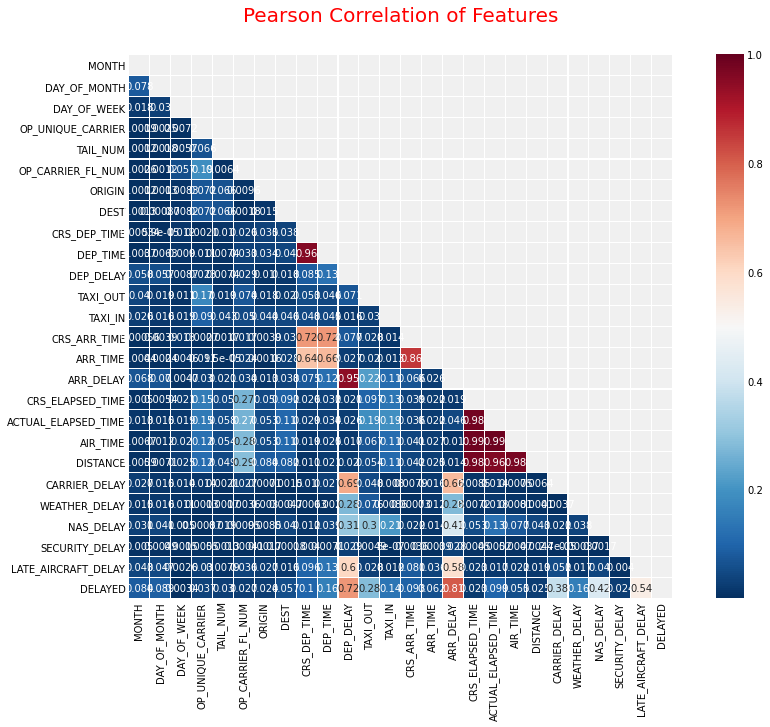

In [ ]:
plt.figure(figsize=(14,10))

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

plt.title('Pearson Correlation of Features', y=1.05, size=20, color='R')

sns.heatmap(lower_matrx, linewidths=0.1, vmax=1.0,
            square=True, cmap=plt.cm.RdBu_r, linecolor='white', annot=True);
plt.show();

In [ ]:
# Select columns with correlations above threshold
features_to_drop = [column for column in lower_matrx.columns if any(lower_matrx[column] > threshold)]

print('There are %d columns to remove.' % (len(features_to_drop)))
features_to_drop

There are 5 columns to remove.


['CRS_DEP_TIME',
 'DEP_DELAY',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME']

In [ ]:
df.drop(features_to_drop, axis=1, inplace=True)

In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
0,1,16,1,0,1373,2186,76,234,9.22,26.0,5.0,10.3,10.40,6.0,1126.0,0.0,0.0,0.0,0.0,0.0,1
1,1,17,2,0,1258,2186,76,234,9.07,31.0,4.0,10.3,10.18,-7.0,1126.0,0.0,0.0,0.0,0.0,0.0,0
2,1,18,3,0,1252,2186,76,234,9.13,44.0,5.0,10.3,10.47,10.0,1126.0,0.0,0.0,0.0,0.0,0.0,1
3,1,19,4,0,1477,2186,76,234,9.08,41.0,8.0,10.3,10.78,29.0,1126.0,0.0,0.0,29.0,0.0,0.0,1
4,1,20,5,0,1505,2186,76,234,9.05,20.0,6.0,10.3,10.18,-7.0,1126.0,0.0,0.0,0.0,0.0,0.0,0


# 10. Feature Selection using Feature Importances

Perform a feature removal by first removing all zero importance features from the model. If this leaves too many features, then we can consider removing the features with the lowest importance. We will use a Gradient Boosted Model from the LightGBM library to assess feature importances. If you're used to the Scikit-Learn library, the LightGBM library has an API that makes deploying the model very similar to using a Scikit-Learn model.

Since the LightGBM model does not need missing values to be imputed, we can directly fit on the training data. We will use Early Stopping to determine the optimal number of iterations and run the model twice, averaging the feature importances to try and avoid overfitting to a certain set of features.

**NOTE:**

**To save time, I will use ONLY 20,000 samples of January 2017 for the feature selection and 5000 samples of January 2017 the training in the next step.**

In [ ]:
# Prepare data
df = df[ df.MONTH == 1 ]

y_train = df['DELAYED']
df.drop( ['DELAYED', 'ARR_DELAY', 'MONTH'], axis=1, inplace=True )

X_train = df.copy()
del df

X_train = X_train[:20_000]
y_train = y_train[:20_000]

In [ ]:
# Modeling 
import lightgbm as lgb

# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X_train.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

X_train.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,16,1,0,1373,2186,76,234,9.22,26.0,5.0,10.3,10.40,1126.0,0.0,0.0,0.0,0.0,0.0
1,17,2,0,1258,2186,76,234,9.07,31.0,4.0,10.3,10.18,1126.0,0.0,0.0,0.0,0.0,0.0
2,18,3,0,1252,2186,76,234,9.13,44.0,5.0,10.3,10.47,1126.0,0.0,0.0,0.0,0.0,0.0
3,19,4,0,1477,2186,76,234,9.08,41.0,8.0,10.3,10.78,1126.0,0.0,0.0,29.0,0.0,0.0
4,20,5,0,1505,2186,76,234,9.05,20.0,6.0,10.3,10.18,1126.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Import
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics         import roc_auc_score

# Fit the model twice to avoid overfitting
nruns = 2
for i in range(nruns):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'logloss', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's multi_logloss: 0.238681	valid_0's multi_logloss: 0.238681
[400]	valid_0's multi_logloss: 0.19946	valid_0's multi_logloss: 0.19946
[600]	valid_0's multi_logloss: 0.1913	valid_0's multi_logloss: 0.1913
Early stopping, best iteration is:
[641]	valid_0's multi_logloss: 0.190192	valid_0's multi_logloss: 0.190192
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's multi_logloss: 0.228877	valid_0's multi_logloss: 0.228877
[400]	valid_0's multi_logloss: 0.194972	valid_0's multi_logloss: 0.194972
Early stopping, best iteration is:
[470]	valid_0's multi_logloss: 0.190924	valid_0's multi_logloss: 0.190924


In [ ]:
# Make sure to average feature importances! 
feature_importances = feature_importances / nruns
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
11,ARR_TIME,8831.0
10,CRS_ARR_TIME,8768.5
3,TAIL_NUM,7393.5
12,DISTANCE,6456.0
4,OP_CARRIER_FL_NUM,6395.5


In [ ]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])

print('There are %d features with 0.0 importance' % len(zero_features))
print(zero_features)

feature_importances.tail()

There are 1 features with 0.0 importance
['SECURITY_DELAY']


,feature,importance
17,LATE_AIRCRAFT_DELAY,3524.5
1,DAY_OF_WEEK,2286.0
2,OP_UNIQUE_CARRIER,1330.0
14,WEATHER_DELAY,733.5
16,SECURITY_DELAY,0.0


In [ ]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plot 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

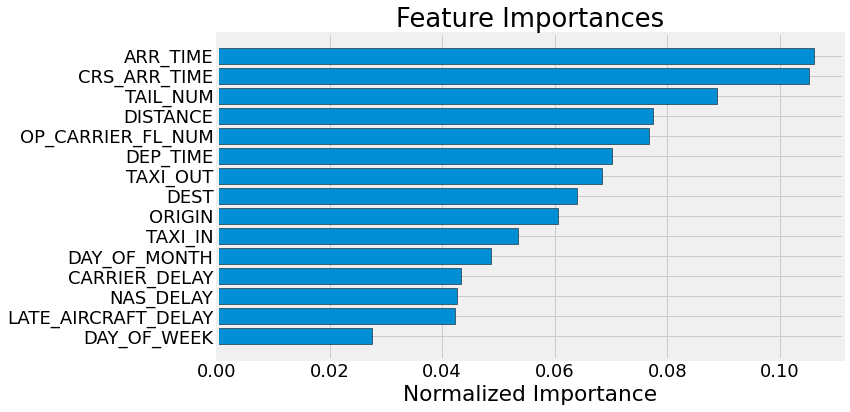

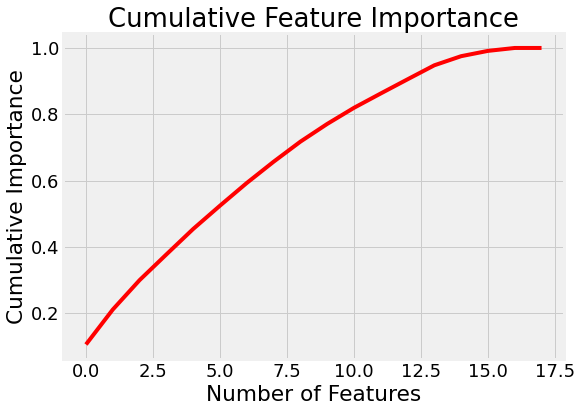

13 features required for 0.90 of cumulative importance


In [ ]:
# Normalized feature importance
norm_feature_importances = plot_feature_importances(feature_importances)

In [ ]:
X_train.drop( zero_features, axis=1, inplace=True )
print('Training shape: ', X_train.shape)

Training shape:  (20000, 17)


At this point, we can re-run the model to see if it identifies any more features with zero importance. In a way, we are implementing our own form of recursive feature elimination. Since we are repeating work, we should probably put the zero feature importance identification code in a function.

In [ ]:
def identify_zero_importance_features(X, y, iterations = 2):
    """
    Identify zero importance features in a training dataset based on the 
    feature importances from a gradient boosting model. 
    
    Parameters
    --------
    X : dataframe
        Training features
        
    y : np.array
        Labels for training data
        
    iterations : integer, default = 2
        Number of cross validation splits to use for determining feature importances
    """
    
    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(X.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')
    
    # Fit the model multiple times to avoid overfitting
    for i in range(iterations):

        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(X, y, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
                  eval_metric = 'logloss', verbose = 200)

        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations
    
    feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

In [ ]:
second_round_zero_features, feature_importances = identify_zero_importance_features(X_train, y_train)

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's multi_logloss: 0.238681	valid_0's multi_logloss: 0.238681
[400]	valid_0's multi_logloss: 0.19946	valid_0's multi_logloss: 0.19946
[600]	valid_0's multi_logloss: 0.1913	valid_0's multi_logloss: 0.1913
Early stopping, best iteration is:
[641]	valid_0's multi_logloss: 0.190192	valid_0's multi_logloss: 0.190192
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's multi_logloss: 0.228877	valid_0's multi_logloss: 0.228877
[400]	valid_0's multi_logloss: 0.194972	valid_0's multi_logloss: 0.194972
Early stopping, best iteration is:
[470]	valid_0's multi_logloss: 0.190924	valid_0's multi_logloss: 0.190924

There are 0 features with 0.0 importance


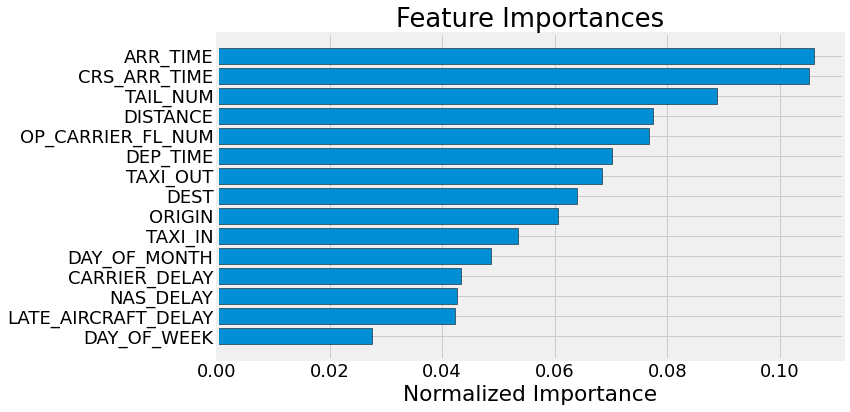

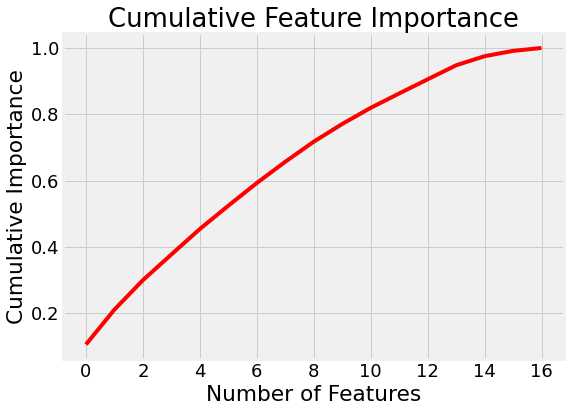

15 features required for 0.95 of cumulative importance


In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)

In [ ]:
feature_importances

,feature,importance
11,ARR_TIME,8831.0
10,CRS_ARR_TIME,8768.5
3,TAIL_NUM,7393.5
12,DISTANCE,6456.0
4,OP_CARRIER_FL_NUM,6395.5
7,DEP_TIME,5852.0
8,TAXI_OUT,5701.5
6,DEST,5333.5
5,ORIGIN,5044.5
9,TAXI_IN,4451.0


In [ ]:
norm_feature_importances

,index,feature,importance,importance_normalized,cumulative_importance
0,11,ARR_TIME,8831.0,0.105992,0.105992
1,10,CRS_ARR_TIME,8768.5,0.105241,0.211233
2,3,TAIL_NUM,7393.5,0.088738,0.299971
3,12,DISTANCE,6456.0,0.077486,0.377457
4,4,OP_CARRIER_FL_NUM,6395.5,0.076760,0.454218
5,7,DEP_TIME,5852.0,0.070237,0.524454
6,8,TAXI_OUT,5701.5,0.068431,0.592885
7,6,DEST,5333.5,0.064014,0.656899
8,5,ORIGIN,5044.5,0.060545,0.717444
9,9,TAXI_IN,4451.0,0.053422,0.770866


In [ ]:
# Threshold for cumulative importance
threshold = 0.95


# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

print('Number of feautures of keep: ', len(features_to_keep))
print('Features to keep: ', features_to_keep)

# Create new datasets with smaller features
X_keep = X_train[features_to_keep]
X_keep

Number of feautures of keep:  14
Features to keep:  ['ARR_TIME', 'CRS_ARR_TIME', 'TAIL_NUM', 'DISTANCE', 'OP_CARRIER_FL_NUM', 'DEP_TIME', 'TAXI_OUT', 'DEST', 'ORIGIN', 'TAXI_IN', 'DAY_OF_MONTH', 'CARRIER_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY']


,ARR_TIME,CRS_ARR_TIME,TAIL_NUM,DISTANCE,OP_CARRIER_FL_NUM,DEP_TIME,TAXI_OUT,DEST,ORIGIN,TAXI_IN,DAY_OF_MONTH,CARRIER_DELAY,NAS_DELAY,LATE_AIRCRAFT_DELAY
0,10.40,10.30,1373,1126.0,2186,9.22,26.0,234,76,5.0,16,0.0,0.0,0.0
1,10.18,10.30,1258,1126.0,2186,9.07,31.0,234,76,4.0,17,0.0,0.0,0.0
2,10.47,10.30,1252,1126.0,2186,9.13,44.0,234,76,5.0,18,0.0,0.0,0.0
3,10.78,10.30,1477,1126.0,2186,9.08,41.0,234,76,8.0,19,0.0,29.0,0.0
4,10.18,10.30,1505,1126.0,2186,9.05,20.0,234,76,6.0,20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,22.42,20.83,695,1855.0,5175,16.73,17.0,180,261,5.0,8,11.0,0.0,84.0
19996,15.53,15.42,3050,1845.0,4738,9.48,31.0,188,261,5.0,8,0.0,0.0,0.0
19997,16.72,16.08,4131,651.0,2498,13.98,16.0,223,261,4.0,8,0.0,0.0,38.0
19998,23.43,21.17,3754,651.0,3226,20.70,14.0,223,261,4.0,8,0.0,0.0,136.0


In [ ]:
X_keep = X_keep.assign(DELAYED = y_train)
X_keep

,ARR_TIME,CRS_ARR_TIME,TAIL_NUM,DISTANCE,OP_CARRIER_FL_NUM,DEP_TIME,TAXI_OUT,DEST,ORIGIN,TAXI_IN,DAY_OF_MONTH,CARRIER_DELAY,NAS_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
0,10.40,10.30,1373,1126.0,2186,9.22,26.0,234,76,5.0,16,0.0,0.0,0.0,1
1,10.18,10.30,1258,1126.0,2186,9.07,31.0,234,76,4.0,17,0.0,0.0,0.0,0
2,10.47,10.30,1252,1126.0,2186,9.13,44.0,234,76,5.0,18,0.0,0.0,0.0,1
3,10.78,10.30,1477,1126.0,2186,9.08,41.0,234,76,8.0,19,0.0,29.0,0.0,1
4,10.18,10.30,1505,1126.0,2186,9.05,20.0,234,76,6.0,20,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,22.42,20.83,695,1855.0,5175,16.73,17.0,180,261,5.0,8,11.0,0.0,84.0,3
19996,15.53,15.42,3050,1845.0,4738,9.48,31.0,188,261,5.0,8,0.0,0.0,0.0,1
19997,16.72,16.08,4131,651.0,2498,13.98,16.0,223,261,4.0,8,0.0,0.0,38.0,2
19998,23.43,21.17,3754,651.0,3226,20.70,14.0,223,261,4.0,8,0.0,0.0,136.0,4


In [ ]:
X_keep.columns

Index(['ARR_TIME', 'CRS_ARR_TIME', 'TAIL_NUM', 'DISTANCE', 'OP_CARRIER_FL_NUM',
       'DEP_TIME', 'TAXI_OUT', 'DEST', 'ORIGIN', 'TAXI_IN', 'DAY_OF_MONTH',
       'CARRIER_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY', 'DELAYED'],
      dtype='object')

In [ ]:
# Re-arrange
X_keep[ ['DAY_OF_MONTH', 'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME', 'ARR_TIME', 'CRS_ARR_TIME', 'DISTANCE', 'TAXI_OUT',
       'TAXI_IN', 'CARRIER_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY', 'DELAYED']]

,DAY_OF_MONTH,OP_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,CRS_ARR_TIME,DISTANCE,TAXI_OUT,TAXI_IN,CARRIER_DELAY,NAS_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
0,16,2186,1373,76,234,9.22,10.40,10.30,1126.0,26.0,5.0,0.0,0.0,0.0,1
1,17,2186,1258,76,234,9.07,10.18,10.30,1126.0,31.0,4.0,0.0,0.0,0.0,0
2,18,2186,1252,76,234,9.13,10.47,10.30,1126.0,44.0,5.0,0.0,0.0,0.0,1
3,19,2186,1477,76,234,9.08,10.78,10.30,1126.0,41.0,8.0,0.0,29.0,0.0,1
4,20,2186,1505,76,234,9.05,10.18,10.30,1126.0,20.0,6.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8,5175,695,261,180,16.73,22.42,20.83,1855.0,17.0,5.0,11.0,0.0,84.0,3
19996,8,4738,3050,261,188,9.48,15.53,15.42,1845.0,31.0,5.0,0.0,0.0,0.0,1
19997,8,2498,4131,261,223,13.98,16.72,16.08,651.0,16.0,4.0,0.0,0.0,38.0,2
19998,8,3226,3754,261,223,20.70,23.43,21.17,651.0,14.0,4.0,0.0,0.0,136.0,4


# Save the cleaned data

In [ ]:
X_keep.to_csv( os.path.join(data_path, 'cleaned_data_jan_20klines.csv'), index=False)